# 1 Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk

In [2]:
data = pd.read_excel('/kaggle/input/twitter-dataset-for-sentiment-analysis/LabeledText.xlsx')
data

,File Name,Caption,LABEL
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive
...,...,...,...
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,positive
4866,997.txt,#blue #eyes can't be #beaten,neutral
4867,998.txt,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral


In [3]:
data.isnull().sum()

File Name    0
Caption      0
LABEL        0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  4869 non-null   object
 1   Caption    4869 non-null   object
 2   LABEL      4869 non-null   object
dtypes: object(3)
memory usage: 114.2+ KB


In [5]:
drop_neutral = data[ data['LABEL'] == 'neutral' ].index
data.drop(drop_neutral, inplace = True)

In [6]:
data.loc[data["LABEL"] == "negative", "LABEL"] = 0
data.loc[data["LABEL"] == "positive", "LABEL"] = 1

In [7]:
data['LABEL'].value_counts()

1    1646
0    1452
Name: LABEL, dtype: int64

In [8]:
data = data.astype({"LABEL": int})

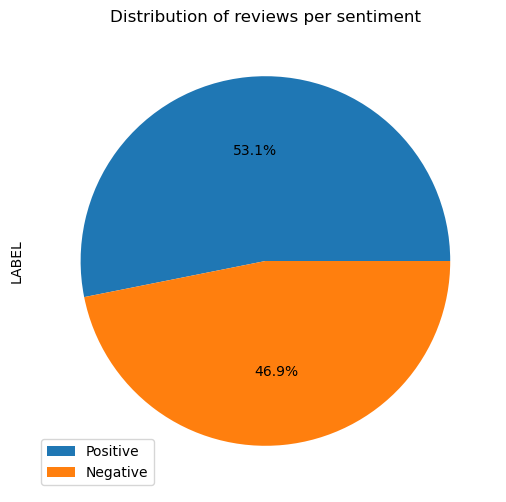

In [9]:
data['LABEL'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['',''],autopct='%1.1f%%')
labels=["Positive","Negative"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')

# 2 Data Pre-Processing

## 2.1 Cleaning Data

In [10]:
# Cleaning data
def remove(tweet):
  #remove mention
  tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
  # remove stock market tickers like $GE
  tweet = re.sub(r'\$\w*', '', tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  tweet = re.sub(r'^rt[\s]+', '', tweet)
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  tweet = re.sub(r'^https[\s]+', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#', '', tweet)
  tweet = re.sub(r'%', '', tweet)
  #remove coma
  tweet = re.sub(r',','',tweet)
  #remove angka
  tweet = re.sub('[0-9]+', '', tweet)
  tweet = re.sub(r':', '', tweet)
  #remove space
  tweet = tweet.strip()
  #remove double space
  tweet = re.sub('\s+',' ',tweet)
  return tweet
  
data['cleaning_data'] = data['Caption'].apply(lambda x: remove(x.lower()))

In [11]:
data.drop_duplicates(subset ="cleaning_data", keep = 'first', inplace = True)

## 2.2 Stopword Removal

In [12]:
#nltk.download('stopwords')
from nltk.corpus import stopwords

In [13]:
#clean stopwords
stopword = set(stopwords.words('english'))
def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text
# Buat kolom tambahan untuk data description yang telah distopwordsremoval   
data['tweet_sw'] = data['cleaning_data'].apply(clean_stopwords)

## 2.3 Stemming

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def porterstemmer(text):
  text = ' '.join(ps.stem(word) for word in text.split() if word in text)
  return text  
data['tweet_stem'] = data['tweet_sw'].apply(porterstemmer)

## 2.4 Lemmazation

In [15]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [16]:
def lemmatization (text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]
    return ' '.join(tokens)
data['tweet_clean'] = data['tweet_stem'].apply(lemmatization)

## 2.5 Data Final

In [17]:
data

,File Name,Caption,LABEL,cleaning_data,tweet_sw,tweet_stem,tweet_clean
0,1.txt,How I feel today #legday #jelly #aching #gym,0,how i feel today legday jelly aching gym,feel today legday jelly aching gym,feel today legday jelli ach gym,feel today legday jelli ach gym
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,0,absolute disgrace two carriages from bangor ha...,absolute disgrace two carriages bangor half wa...,absolut disgrac two carriag bangor half way st...,absolut disgrac carriag bangor half way stand ...
2,100.txt,This is my Valentine's from 1 of my nephews. I...,1,this is my valentine's from of my nephews. i a...,valentine's nephews. elated; sometimes little ...,valentine' nephews. elated; sometim littl thin...,valentine nephew elated sometim littl thing bi...
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,1,zoe's first love rattled,zoe's first love rattled,zoe' first love rattl,zoe love rattl
5,1002.txt,Chaotic Love - giclee print ?65 at #art #love ...,1,chaotic love - giclee print ? at art love chao...,chaotic love - giclee print ? art love chaotic...,chaotic love - gicle print ? art love chaotic ...,chaotic love gicle print art love chaotic abst...
...,...,...,...,...,...,...,...
4856,988.txt,RT @bishopcarrollhs: Great @bishopcarrollhs st...,1,great students caring empowerbchs,great students caring empowerbchs,great student care empowerbch,great student care empowerbch
4857,989.txt,Big thank you to all of the teachers who atten...,1,big thank you to all of the teachers who atten...,big thank teachers attended isabcpd¡ªso nice m...,big thank teacher attend isabcpd¡ªso nice meet...,big thank teacher attend isabcpd¡ªso nice meet...
4858,99.txt,@__Dave24 looks so elated ?,1,looks so elated ?,looks elated ?,look elat ?,look elat
4861,992.txt,"RT @headquarters: To be fair, everything makes...",0,to be fair everything makes me want to scream....,fair everything makes want scream. anger,fair everyth make want scream. anger,fair everyth want scream anger


# 3 TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(data['tweet_clean'])
vector = vectorizer.transform(data['tweet_clean'])
print(vector)

  (0, 7105)	0.2746654615786262
  (0, 4026)	0.5084683581165743
  (0, 3683)	0.4835649376070032
  (0, 3057)	0.42332300100780396
  (0, 2492)	0.2918814379186445
  (0, 43)	0.40961765970653863
  (1, 7578)	0.27223986807082534
  (1, 6585)	0.2853452821918143
  (1, 5912)	0.2853452821918143
  (1, 3082)	0.29551063112537024
  (1, 1902)	0.5491530886300393
  (1, 1113)	0.37713459069057
  (1, 557)	0.37713459069057
  (1, 23)	0.29947445173806314
  (2, 7406)	0.2715609279324852
  (2, 7018)	0.5674724051355987
  (2, 6451)	0.3631145644178158
  (2, 4774)	0.37412012693369345
  (2, 4113)	0.27312679117182587
  (2, 2935)	0.23021407179641162
  (2, 2155)	0.3541223650937916
  (2, 711)	0.2818018154524938
  (3, 7875)	0.6728302574386448
  (3, 5671)	0.6728302574386448
  (3, 4175)	0.30756932446213503
  :	:
  (2892, 6694)	0.5155826343543867
  (2892, 2984)	0.40463894466936257
  (2892, 2205)	0.6400052569789346
  (2892, 1097)	0.4010425696212102
  (2893, 7886)	0.3827458768647352
  (2893, 6974)	0.22706567859873406
  (2893, 6909)

# 4 Split Dataset

In [19]:
from sklearn.model_selection import train_test_split
X = data['tweet_clean']
y = data['LABEL']

X_train, X_test, y_train, y_test = train_test_split(vector,y,test_size = 0.2)

# 5 Model Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [21]:
predictions = model.predict(X_test)

# 6 Evaluation Model

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print("Accuracy Score Testing :")
print(accuracy_score(y_test, predictions))

print("Confusion Matrix : ")
print(confusion_matrix(y_test,predictions))

print("Classification Report : ")
print(classification_report(y_test,predictions))

Accuracy Score Testing :
0.846551724137931
Confusion Matrix : 
[[256  19]
 [ 70 235]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       275
           1       0.93      0.77      0.84       305

    accuracy                           0.85       580
   macro avg       0.86      0.85      0.85       580
weighted avg       0.86      0.85      0.85       580

